# IDAES-GTEP Tutorial Notebook

This notebook presents an introductory tutorial to using the `IDAES-GTEP` tool. To illustrate how to solve an expansion planning model, we use the PJM 5-bus test case with a few different assumptions on the network. With the solution of this model, this tutorial demonstrates some basic result visualizations on the investment options and grid operations. 

To explain the different steps involved in the creation and solution of an expansion planning model, we separated this tutorial into two parts: 

**Part I**: Describes how to create, set up, and solve the `IDAES-GTEP` expansion planning class `ExpansionPlanningModel` using a configuration with time period subsets.

**Part II**: Describes how to create, set up, and solve the `IDAES-GTEP` expansion planning class `ExpansionPlanningModel` using a configuration with time period dictionary. NOTE: This part will be included in following version of this tutorial. 

## PART I: Create Model with Time Subsets

The expansion planning model `ExpansionPlanningModel` in `IDAES-GTEP` with time period subsets requires the following parameters:

* `stages`: integer number of investment periods

* `formulation`: type of optimal power flow (OPF) problem when using `Egret`. Currently, this model supports DCOPF and copper plate formulations. Note that this should be included when using `EGRET`, otherwise, do not include this argument. 

* `data`: full set of model data. 

* `num_reps`: integer number of representative periods per investment period.

* `len_reps`: integer length of each representative period in hours.

* `num_commit`: integer number of commitment periods per representative period.

* `num_dispatch`: integer number of dispatch periods per commitment period.


Once we define the parameters, we start building the expansion planning model. We start by importing the necessary libraries from `Pyomo` and `IDAES-GTEP`:

In [1]:
# Import Pyomo components
from pyomo.core import TransformationFactory
from pyomo.contrib.appsi.solvers.highs import Highs
from pyomo.contrib.appsi.solvers.gurobi import Gurobi

# Import expansion planning components from IDAES-GTEP
from gtep.gtep_model import ExpansionPlanningModel
from gtep.gtep_data import ExpansionPlanningData
from gtep.gtep_solution import ExpansionPlanningSolution

'_BlockData'.  The class '_BlockData' has been renamed to 'BlockData'.
(deprecated in 6.7.2) (called from /home/esrawli/envs/test-
idaes/lib/python3.9/site-packages/coramin/relaxations/relaxations_base.py:43)
expression symbols from pyomo.core.expr  (deprecated in 6.6.2) (called from
<frozen importlib._bootstrap>:228)
Interactive Python mode detected; using default matplotlib backend for plotting.


Include the data for the PJM 5-bus case study and load it to `Prescient`. This loads a default set of representative days.

In [2]:
data_path = "./data/5bus"
data_object = ExpansionPlanningData()
data_object.load_prescient(data_path)

/home/esrawli/envs/test-idaes/lib/python3.9/site-packages/egret/parsers/rts_gmlc/parser.py:254: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_name,
/home/esrawli/envs/test-idaes/lib/python3.9/site-packages/egret/parsers/rts_gmlc/parser.py:254: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_name,
/home/esrawli/envs/test-idaes/lib/python3.9/site-packages/egret/parsers/rts_gmlc/parser.py:254: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_name,
/home/esrawli/envs/test-idaes/lib/python3.9/site-packages/egret/parsers/rts_gmlc/parser.py:254: FutureWarning: Support for nested seq

Build the expansion planning object `ExpansionPlanningModel` with no specific OPF formulation. DCOPF is built into the model, so it is the default OPF formulation.

In [3]:
mod_object = ExpansionPlanningModel(
    stages=2,
    data=data_object.md,
    num_reps=2,
    len_reps=1,
    num_commit=6,
    num_dispatch=4,
)

Create a concrete Pyomo model object associated with the model `ExpansionPlanningModel`. 

In [4]:
mod_object.create_model()

[    0.00] Creating GTEP Model
(type=<class 'pyomo.core.base.var.ScalarVar'>) on block investmentStage[1]
with a new Component (type=<class
'pyomo.core.base.expression.ScalarExpression'>). This is usually indicative of
a modelling error. To avoid this warning, use block.del_component() and
block.add_component().
(type=<class 'pyomo.core.base.var.ScalarVar'>) on block investmentStage[2]
with a new Component (type=<class
'pyomo.core.base.expression.ScalarExpression'>). This is usually indicative of
a modelling error. To avoid this warning, use block.del_component() and
block.add_component().


Include the transformations to convert the GDP problem into a Mixed-Integer Linear Programming (MILP) problem. To do this, first we declare the `bound_pretransformation` from the `pyomo.gdp` component to define lower and upper bounds that can be used in the Big-M transformation.

In [5]:
TransformationFactory("gdp.bound_pretransformation").apply_to(mod_object.model)

TransformationFactory("gdp.bigm").apply_to(mod_object.model)

Declare the solver and solve the problem.

In [6]:
opt = Gurobi()
#opt = Highs()
mod_object.results = opt.solve(mod_object.model)

Save and load solution information using the `ExpansionPlanningSolution` object from `IDAES-GTEP`.  

[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out quotaDeficit from investmentStage[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out expansionCost from investmentStage[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out renewableCurtailmentInvestment from investmentStage[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out quotaDeficit from investmentStage[2], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out expansionCost from investmentStage[2], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out renewableCurtailmentInvestment from inv

/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:397: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bins.set_yticklabels([None]+list(vars))
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:416: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  tmp_rect = plt.Rectangle([tx-0.5+width_padding, ((ix_var)+(interstate_height*(ix_key+1)))-0.5],
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:272: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.fillna(value=np.nan)


[WARNING] _level_relationship_dict_to_df_workhorse attempted to create dataframe and failed: All arrays must be of the same length
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from representativePeriod[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from representativePeriod[2], failed with error list index out of range. Skipping.
[WARNING] discover_level_relationships has encountered an error: Attempted to split out _logical_to_disjunctive, failed with error: "list index out of range". Assigning as axuilary.
[WARNING] _level_relationship_dict_to_df_workhorse attempted to create dataframe and failed: All arrays must be of the same length
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[1], failed with error list index out of range. Skippi

/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:397: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bins.set_yticklabels([None]+list(vars))
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:416: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  tmp_rect = plt.Rectangle([tx-0.5+width_padding, ((ix_var)+(interstate_height*(ix_key+1)))-0.5],
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:272: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.fillna(value=np.nan)
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:272: FutureWarning: Do

[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[2], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[3], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[4], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[5], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out

/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:397: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bins.set_yticklabels([None]+list(vars))
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:416: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  tmp_rect = plt.Rectangle([tx-0.5+width_padding, ((ix_var)+(interstate_height*(ix_key+1)))-0.5],
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:272: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.fillna(value=np.nan)
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:272: FutureWarning: Do

[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out quotaDeficit from investmentStage[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out expansionCost from investmentStage[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out renewableCurtailmentInvestment from investmentStage[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out quotaDeficit from investmentStage[2], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out expansionCost from investmentStage[2], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out renewableCurtailmentInvestment from inv

/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:397: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bins.set_yticklabels([None]+list(vars))
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:416: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  tmp_rect = plt.Rectangle([tx-0.5+width_padding, ((ix_var)+(interstate_height*(ix_key+1)))-0.5],
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:272: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.fillna(value=np.nan)


[WARNING] _level_relationship_dict_to_df_workhorse attempted to create dataframe and failed: All arrays must be of the same length
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from representativePeriod[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from representativePeriod[2], failed with error list index out of range. Skipping.
[WARNING] discover_level_relationships has encountered an error: Attempted to split out _logical_to_disjunctive, failed with error: "list index out of range". Assigning as axuilary.
[WARNING] _level_relationship_dict_to_df_workhorse attempted to create dataframe and failed: All arrays must be of the same length
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[1], failed with error list index out of range. Skippi

/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:397: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bins.set_yticklabels([None]+list(vars))
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:416: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  tmp_rect = plt.Rectangle([tx-0.5+width_padding, ((ix_var)+(interstate_height*(ix_key+1)))-0.5],
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:272: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.fillna(value=np.nan)
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:272: FutureWarning: Do

[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[2], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[3], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[4], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from commitmentPeriod[5], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out

/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:397: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bins.set_yticklabels([None]+list(vars))
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:416: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  tmp_rect = plt.Rectangle([tx-0.5+width_padding, ((ix_var)+(interstate_height*(ix_key+1)))-0.5],
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:272: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.fillna(value=np.nan)
/home/esrawli/envs/test-idaes/downloads/idaes-gtep/gtep/gtep_solution.py:311: RuntimeWarning: M

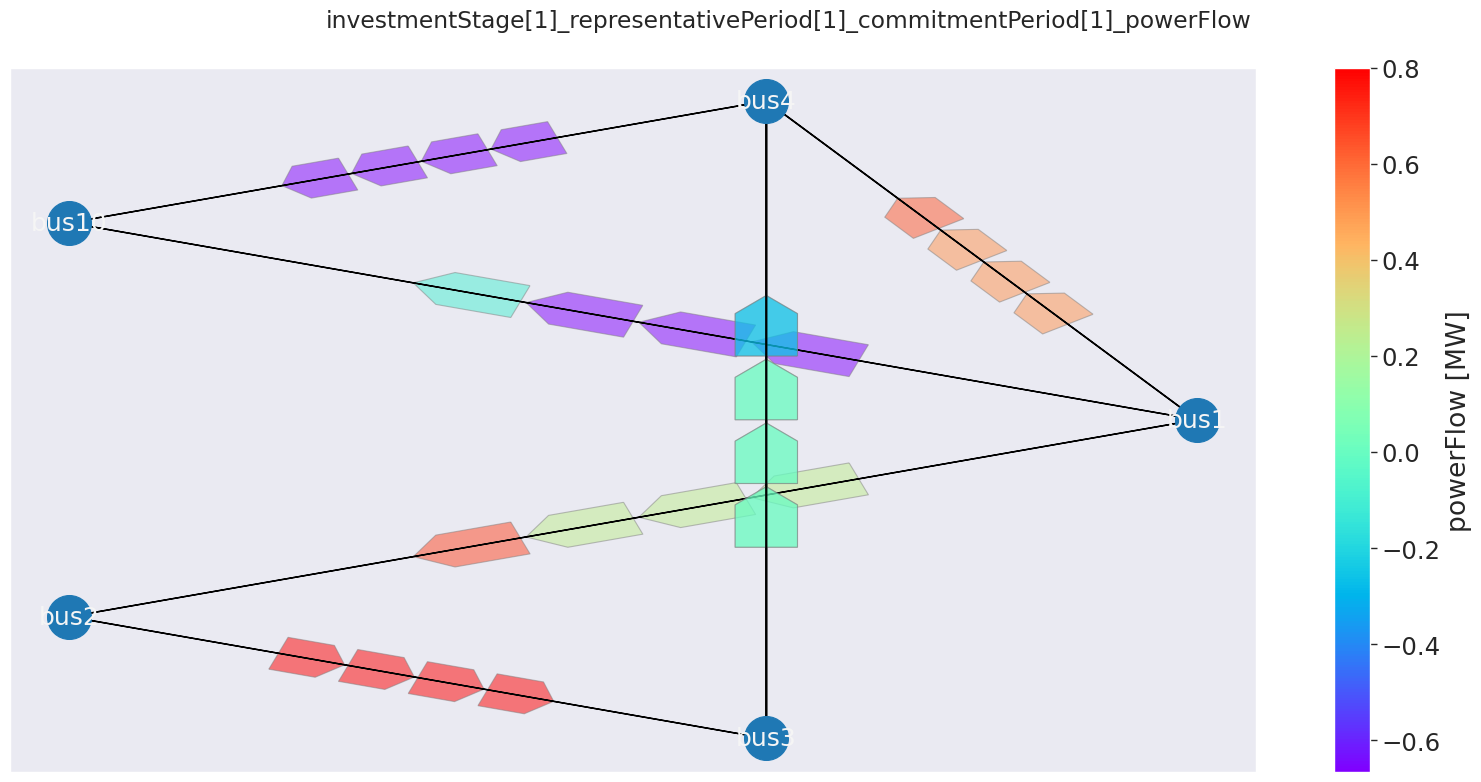

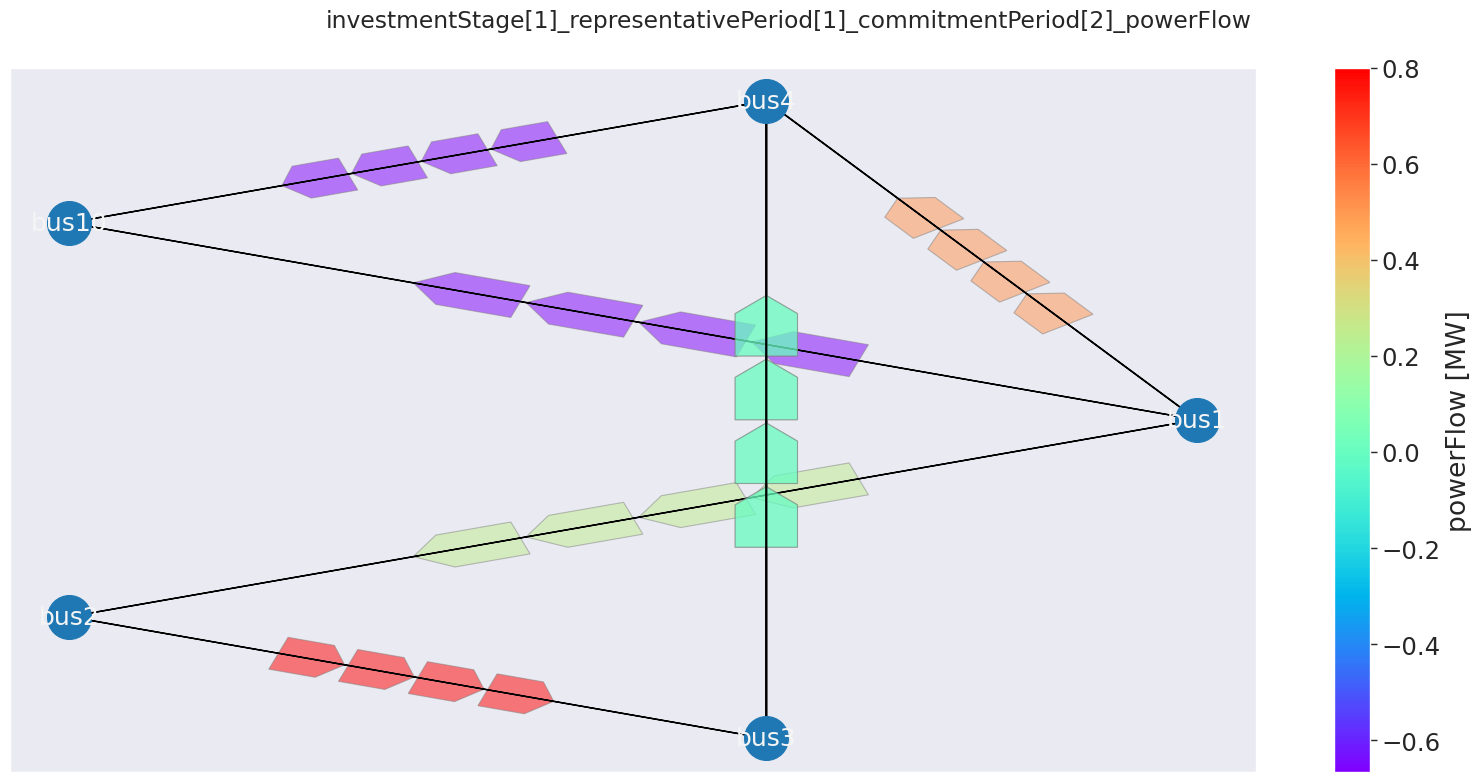

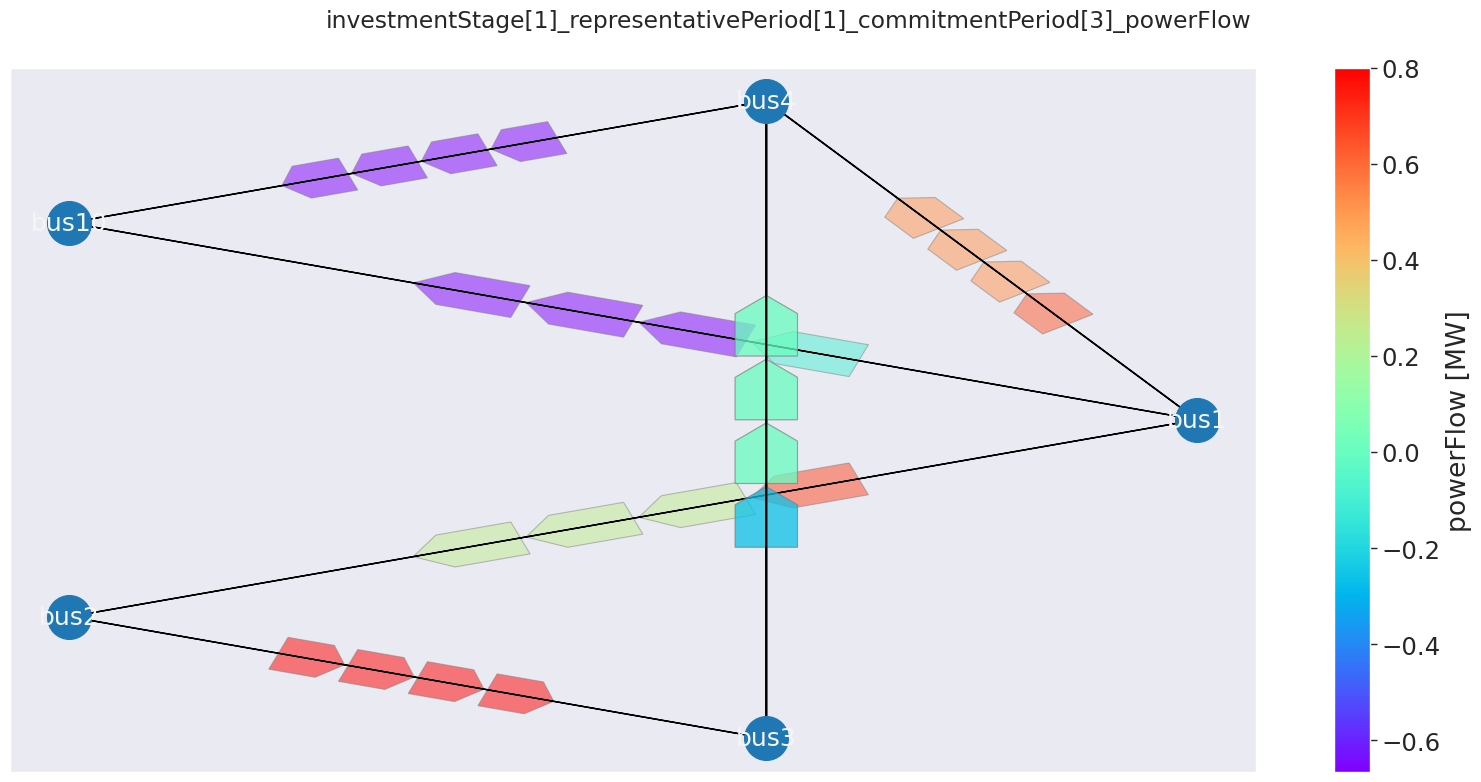

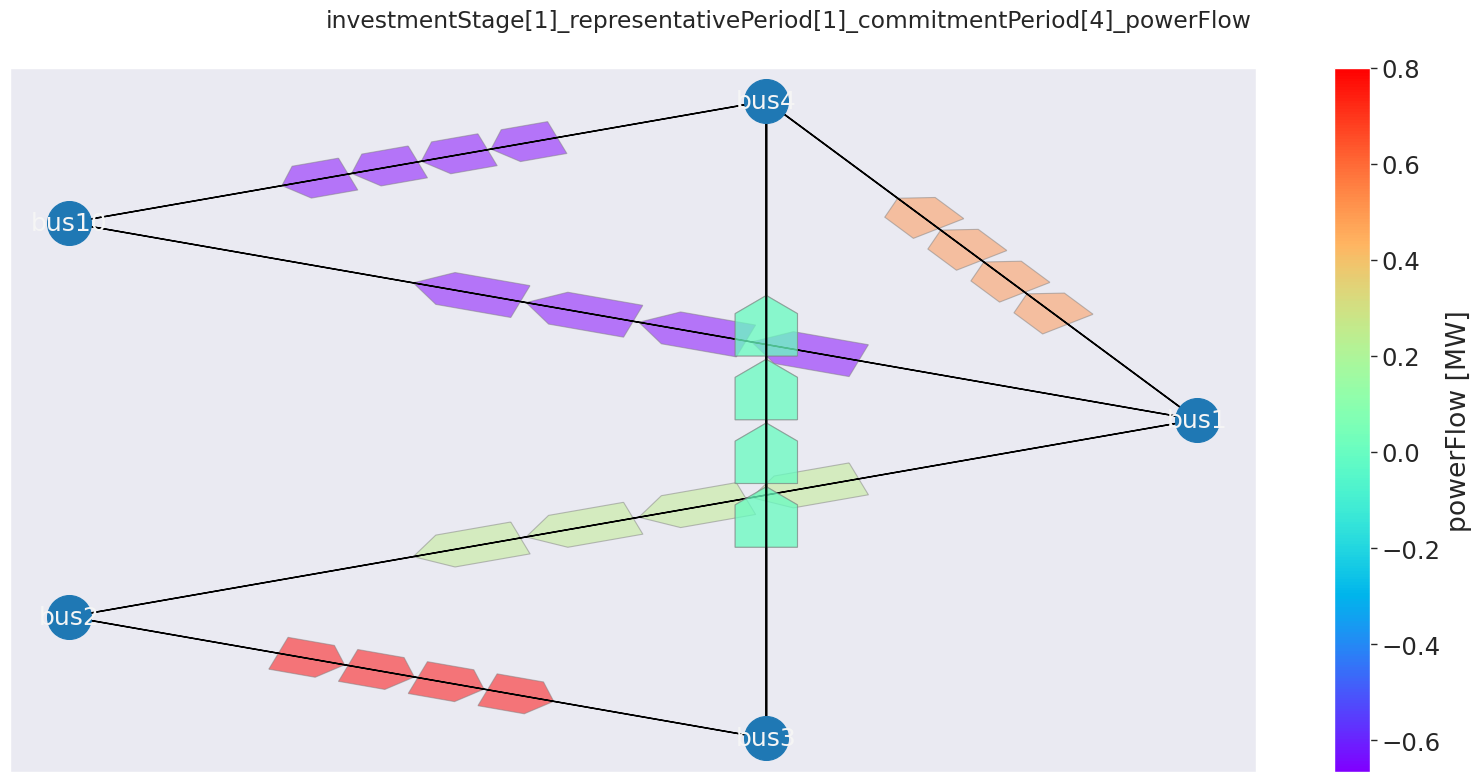

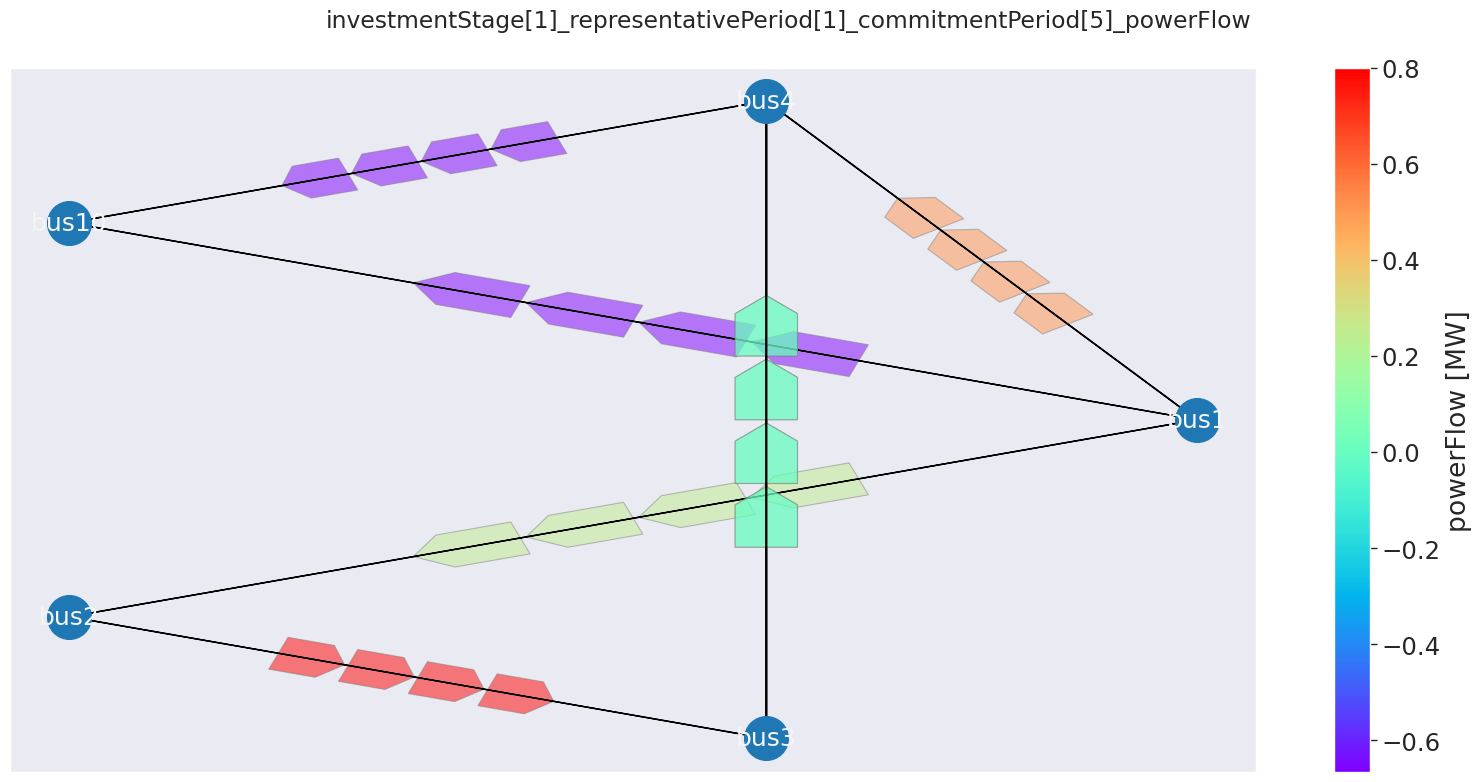

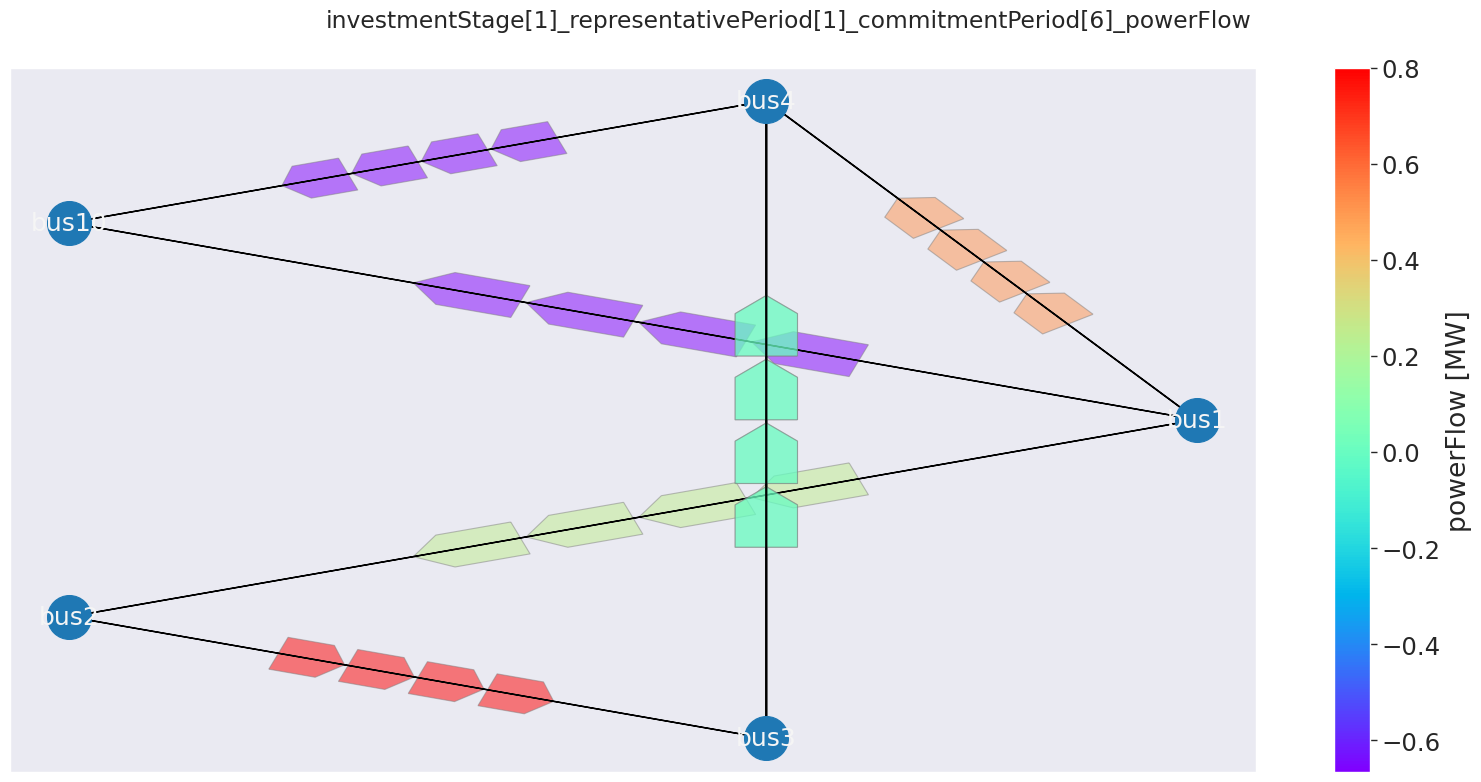

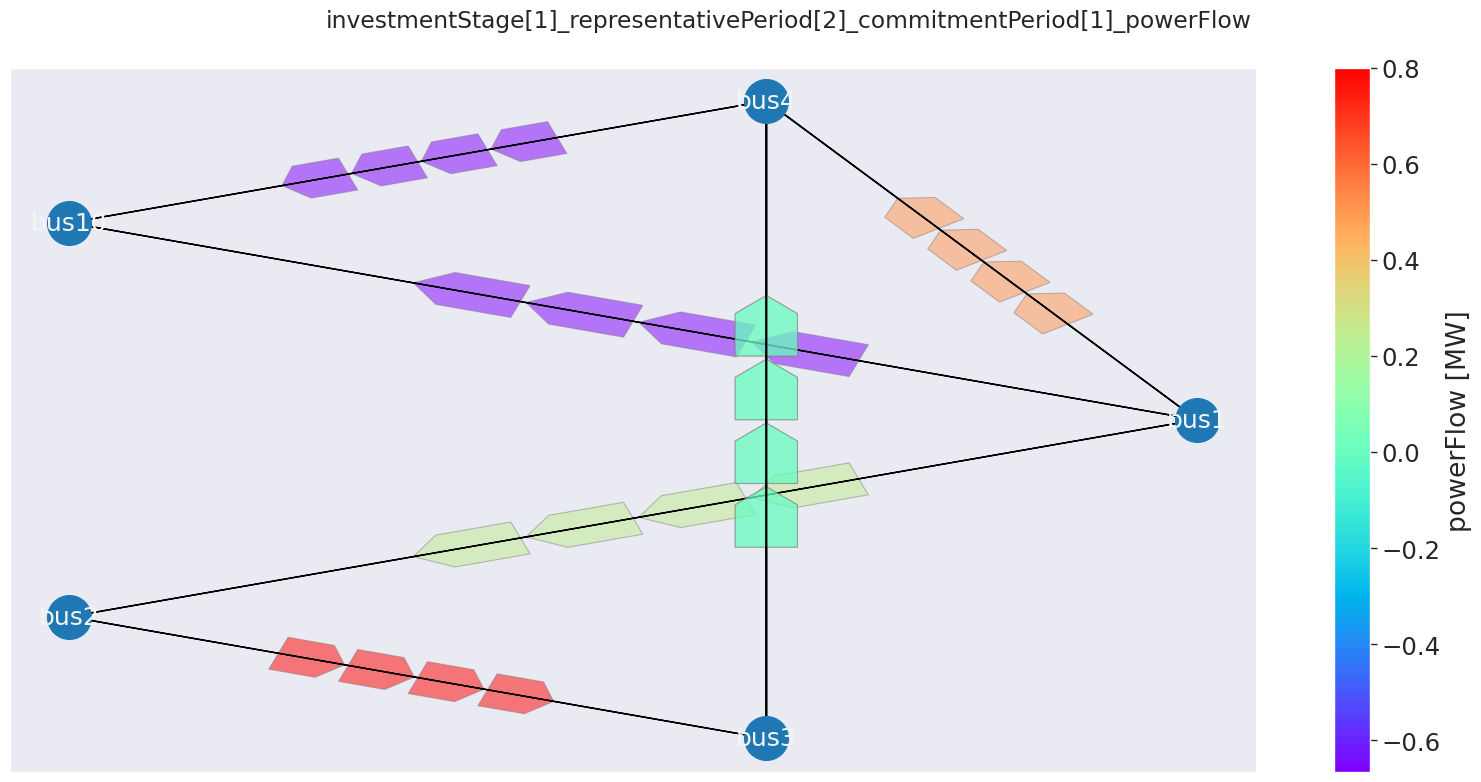

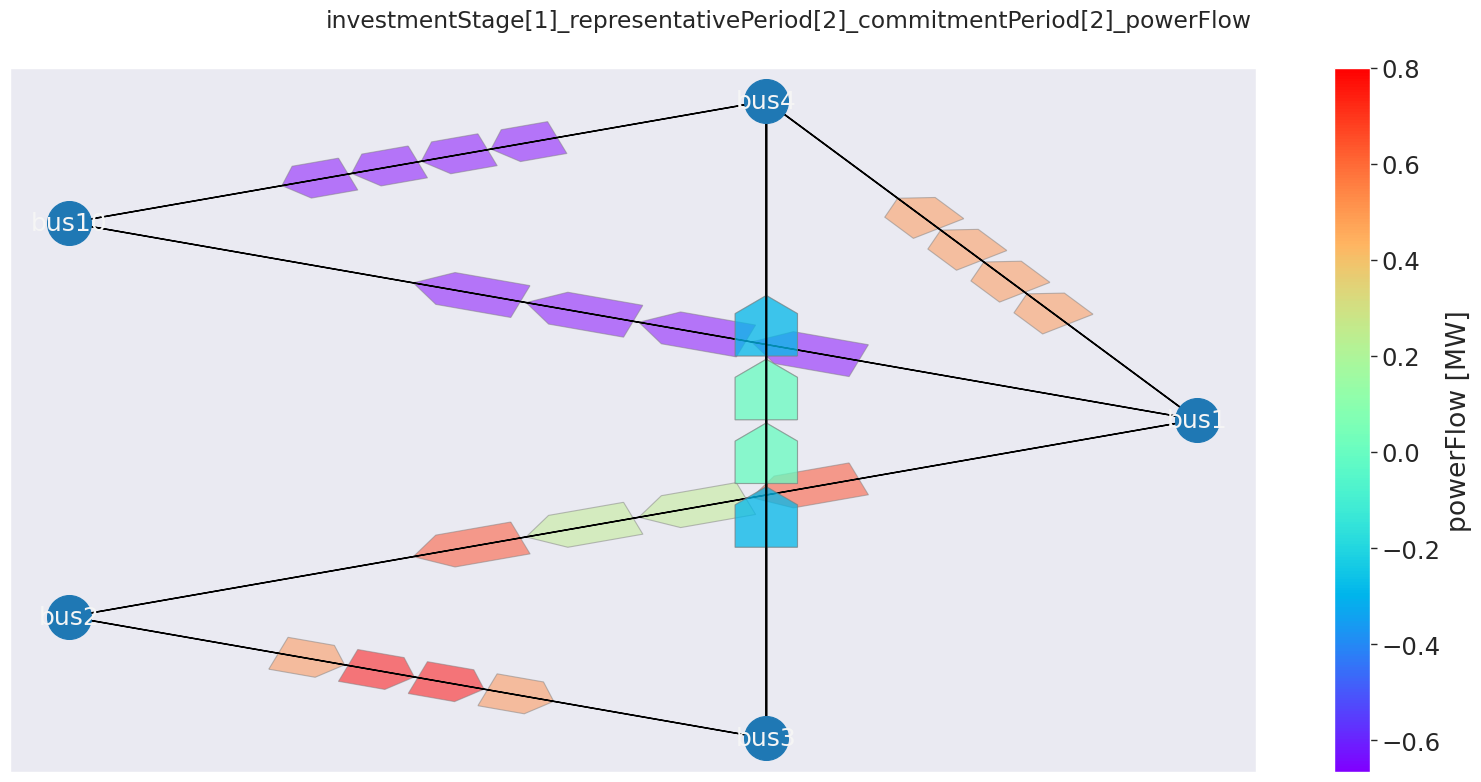

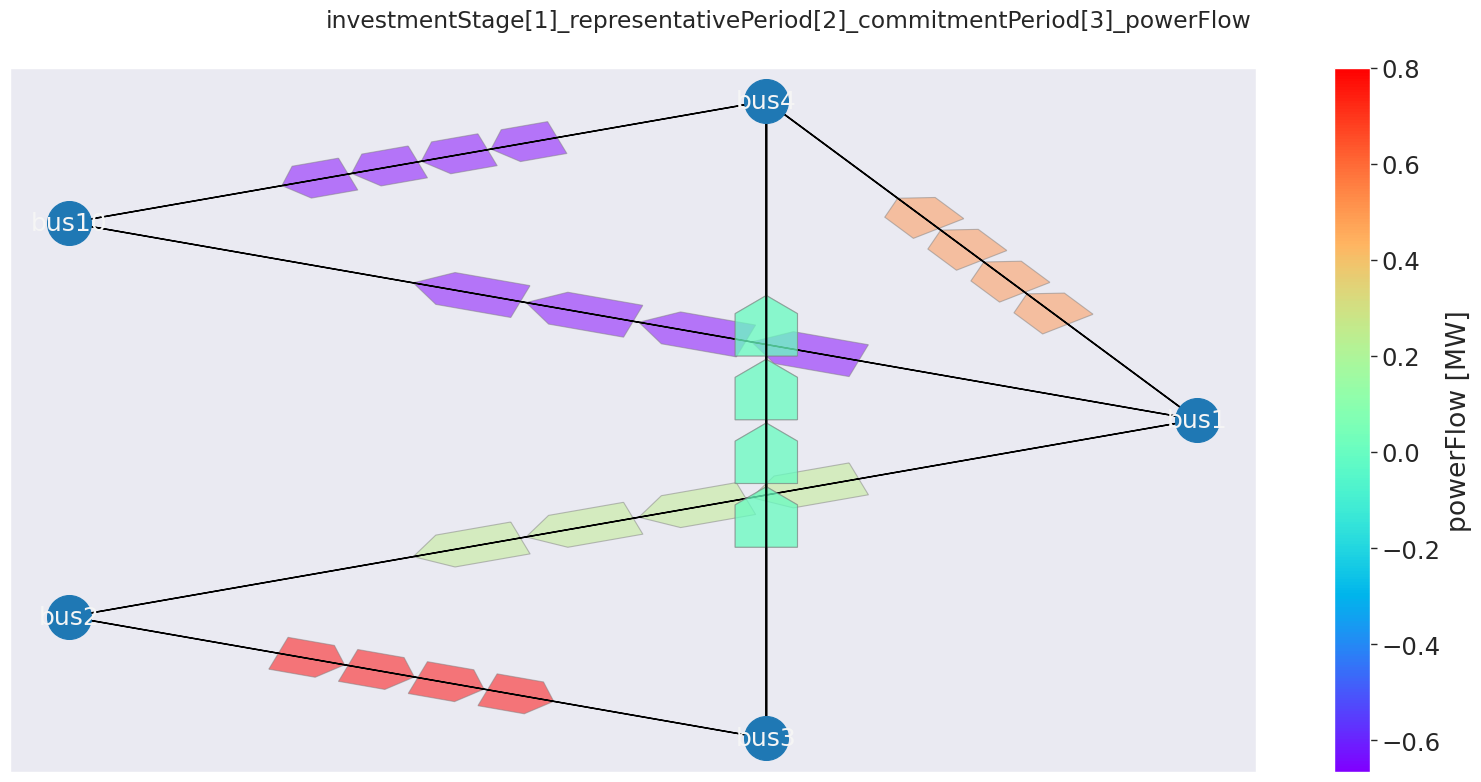

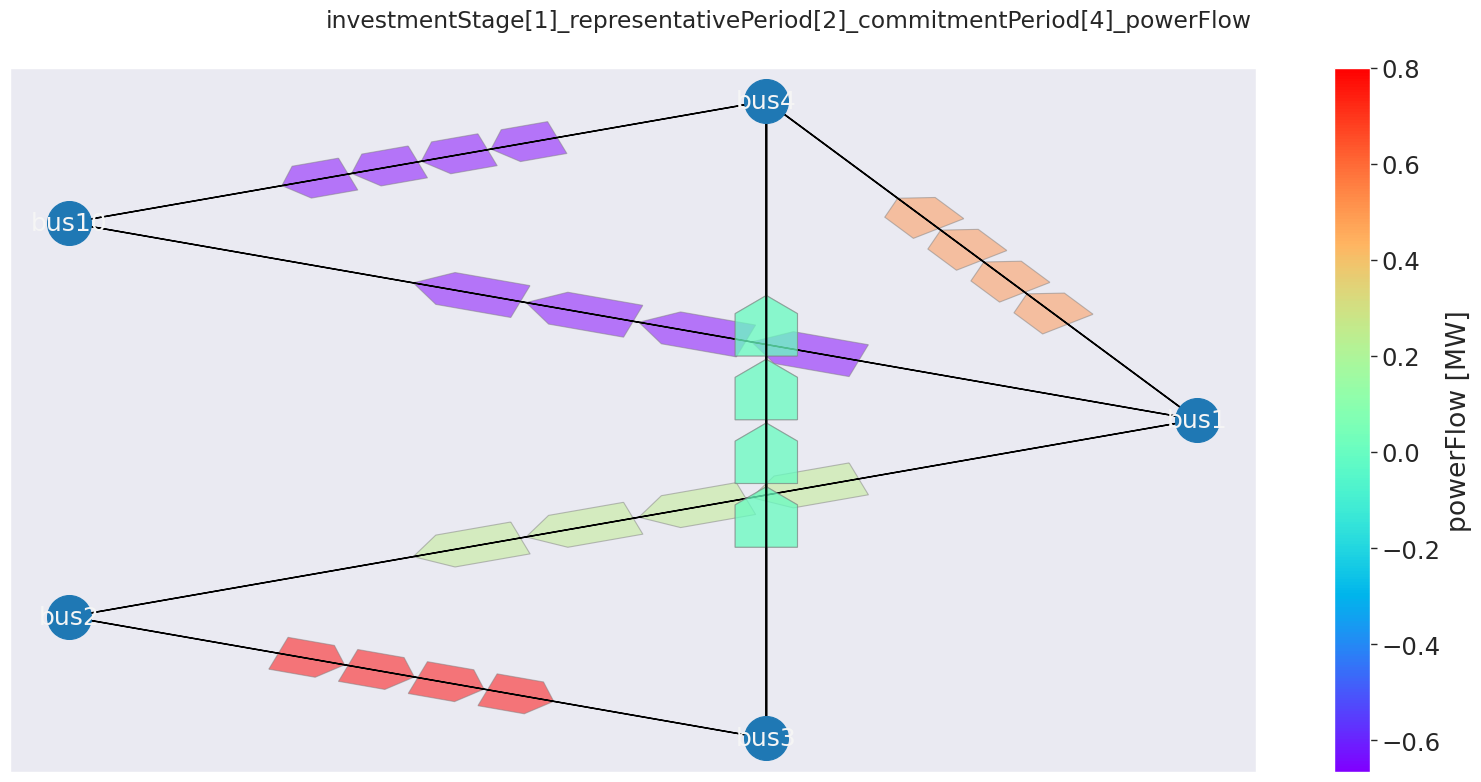

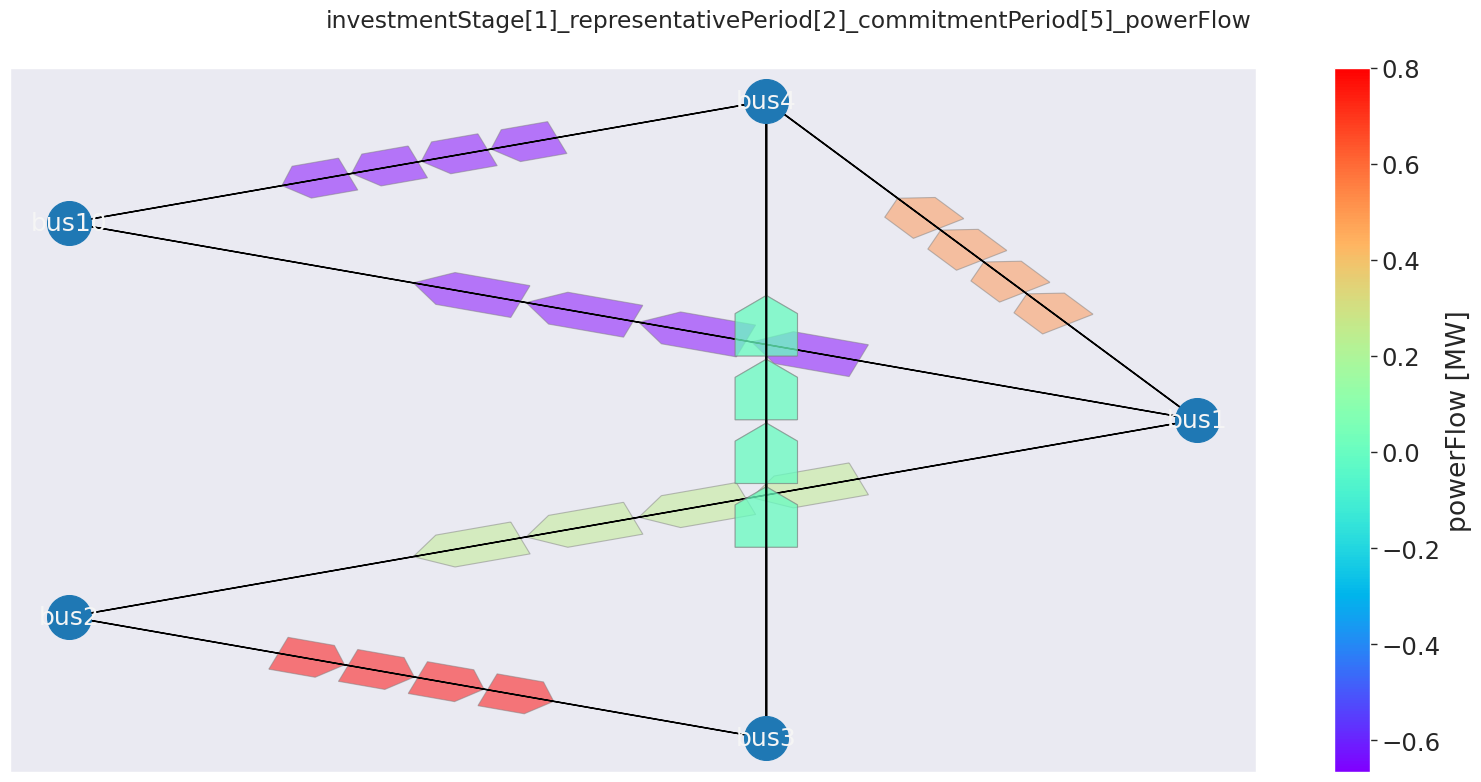

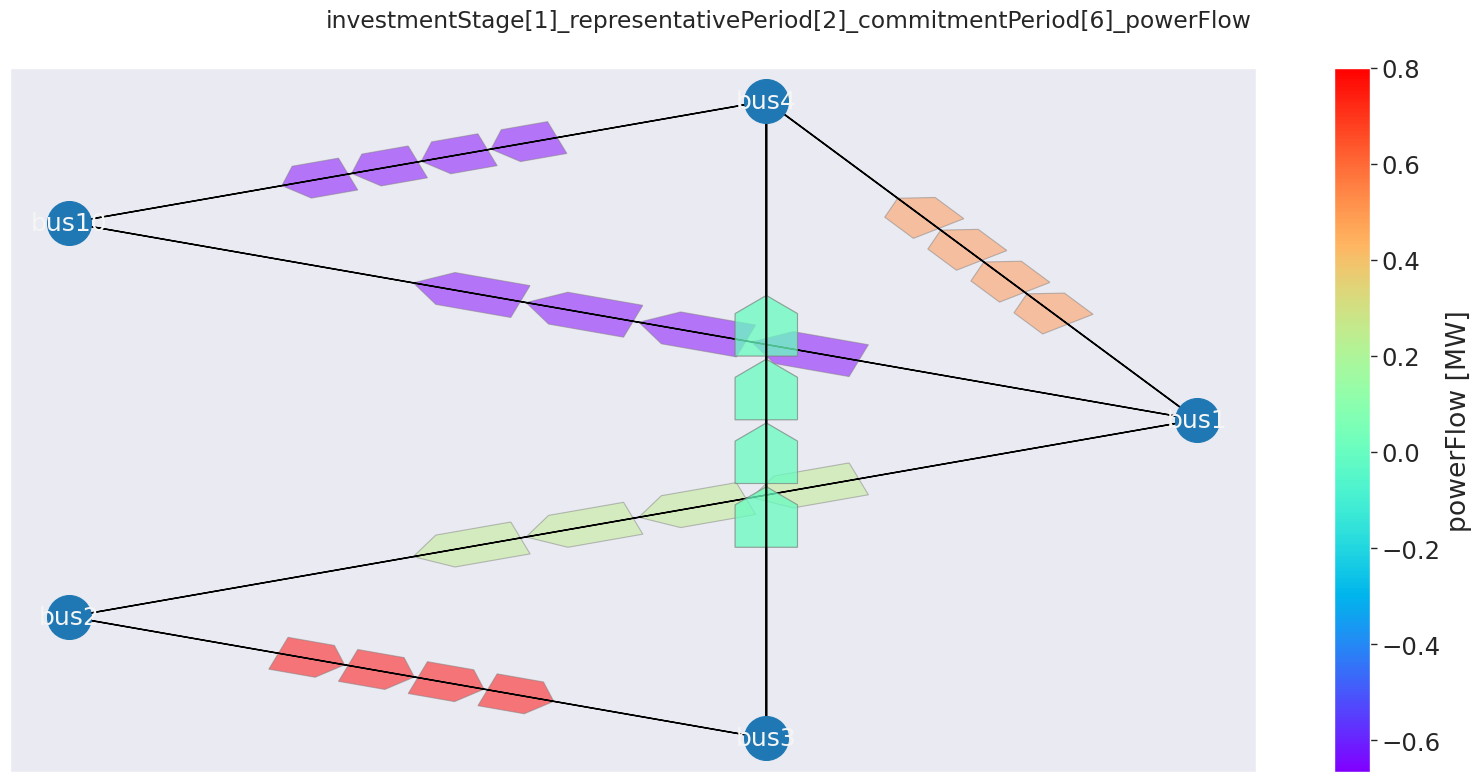

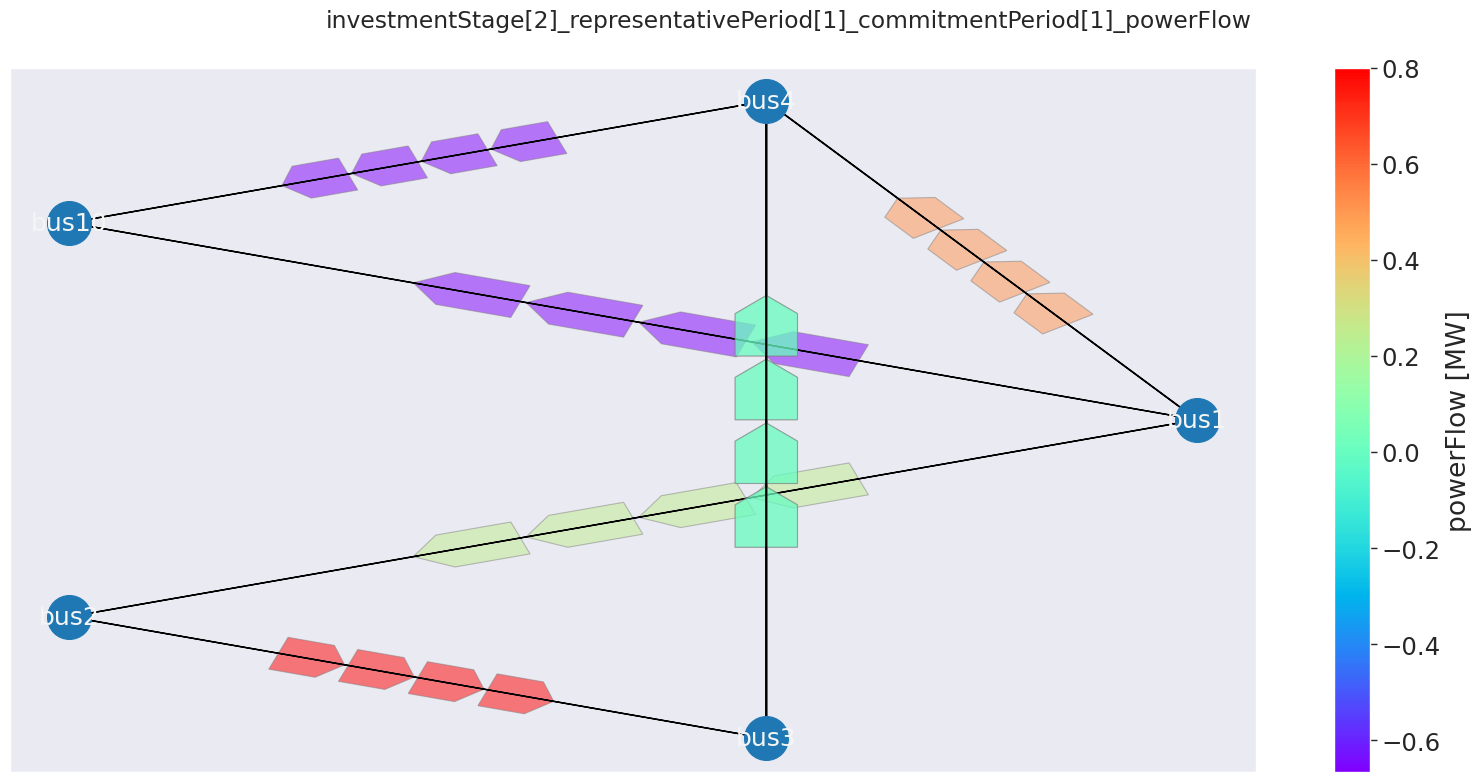

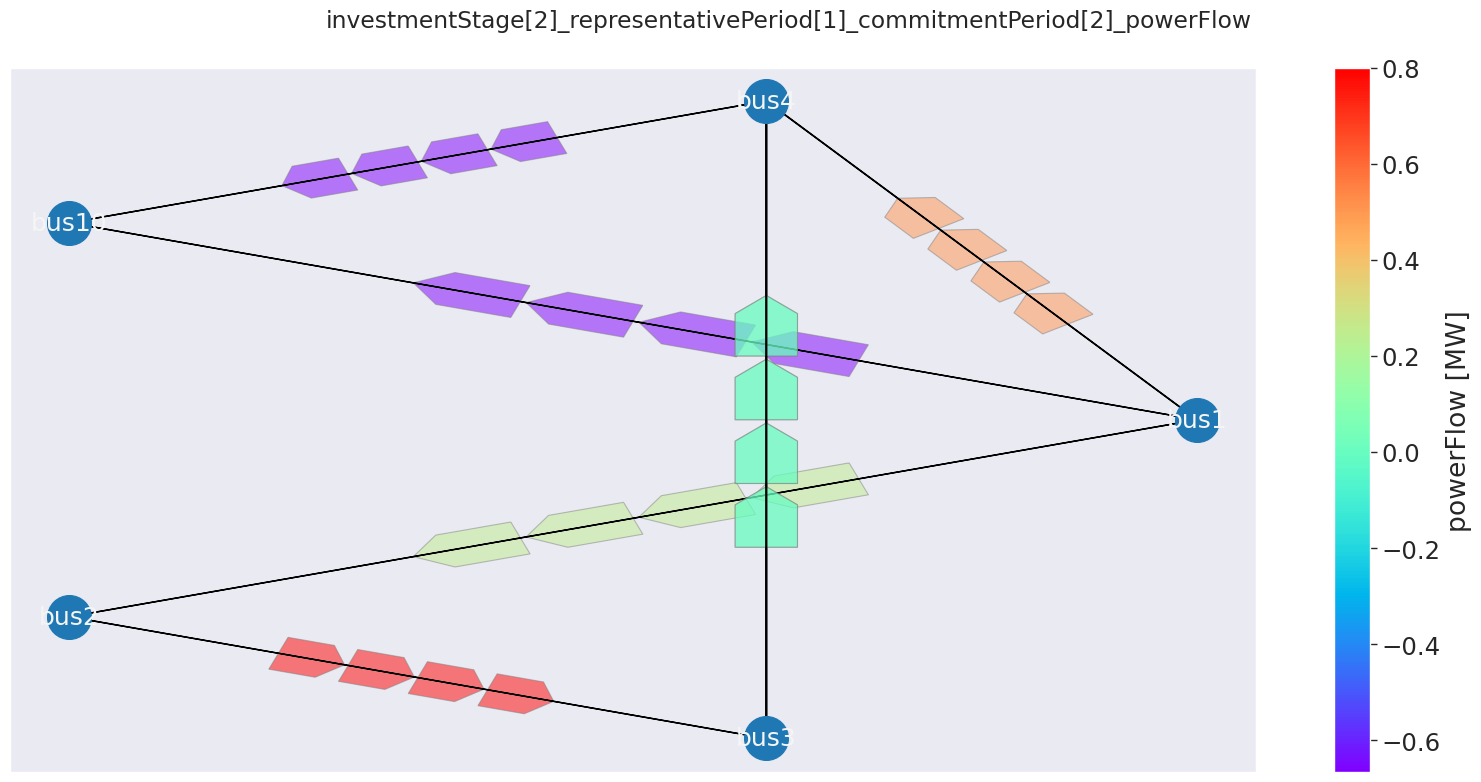

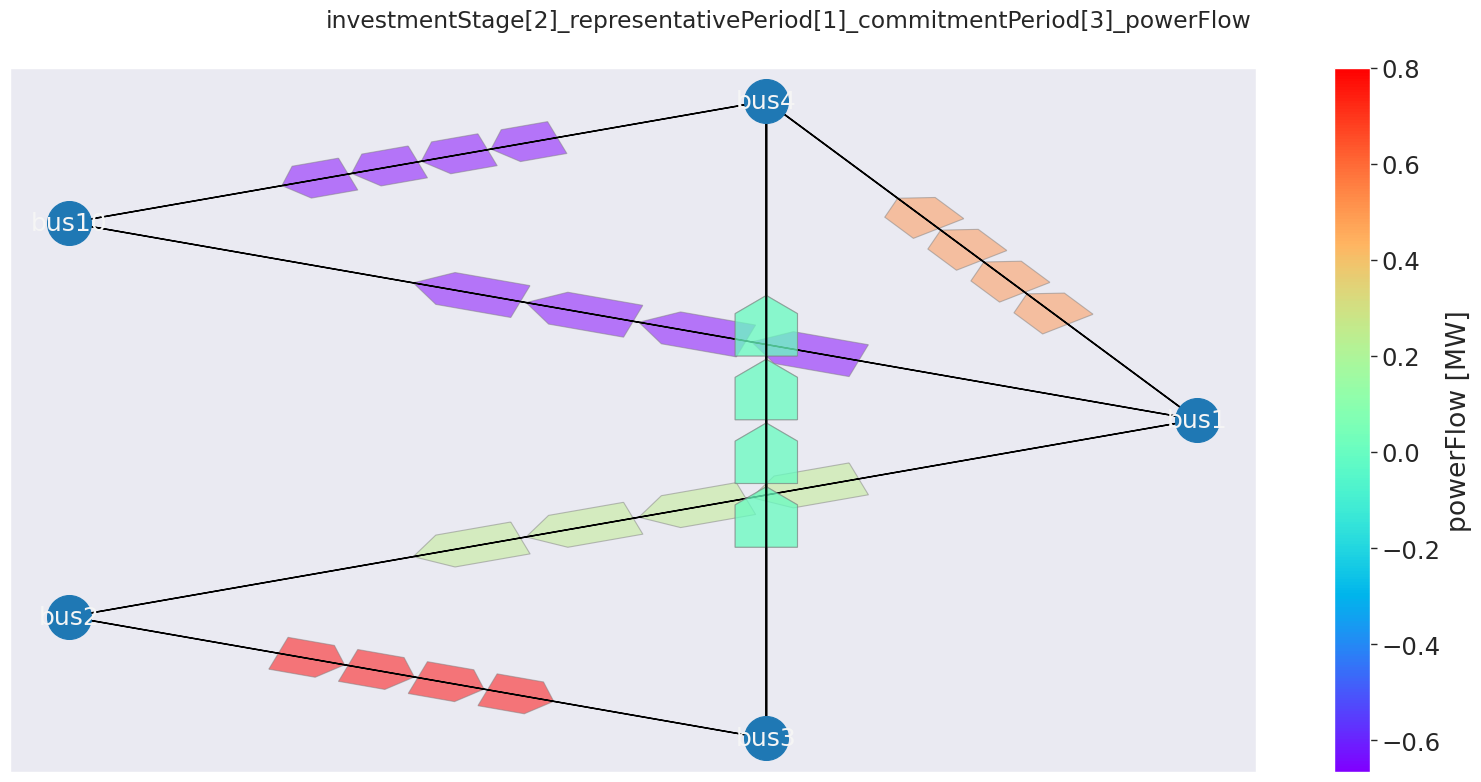

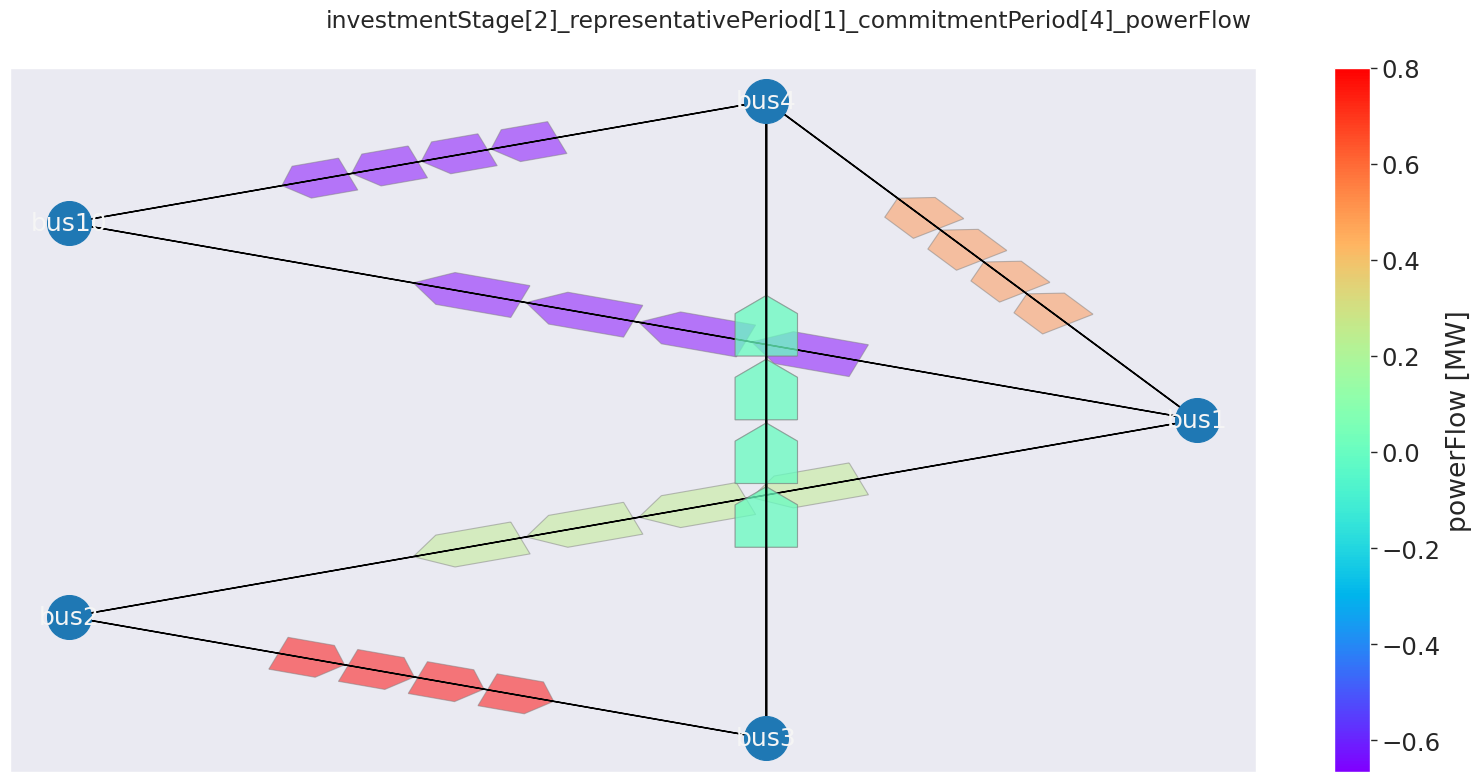

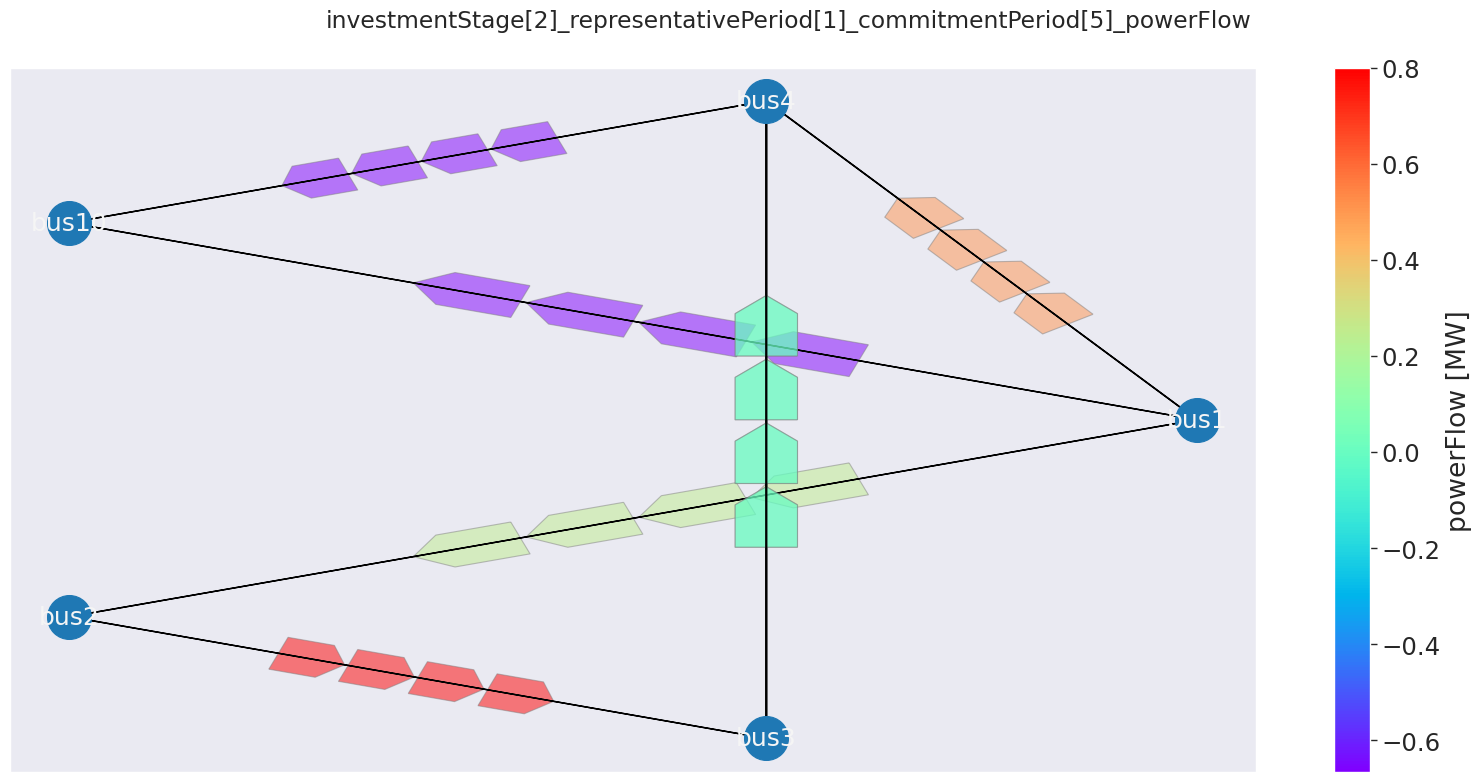

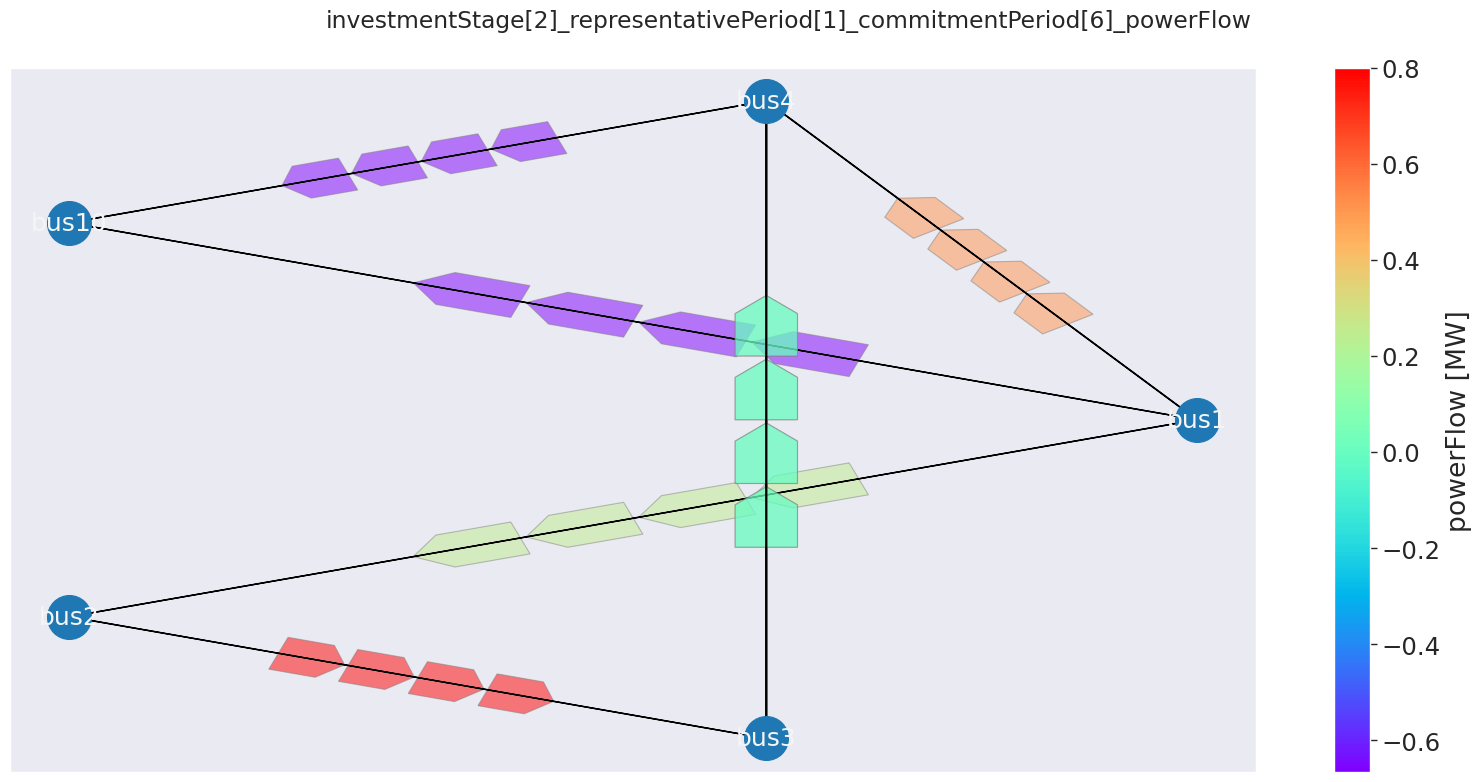

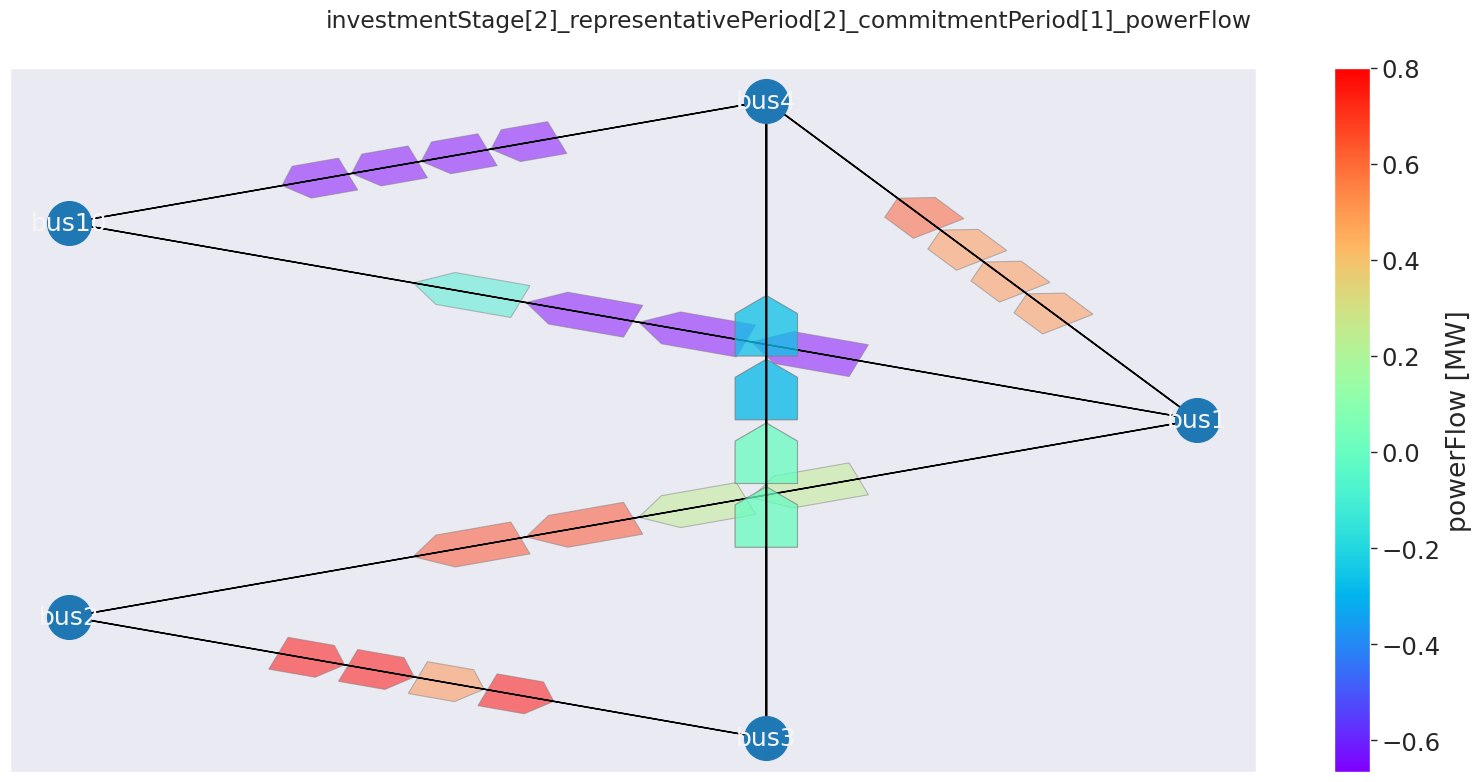

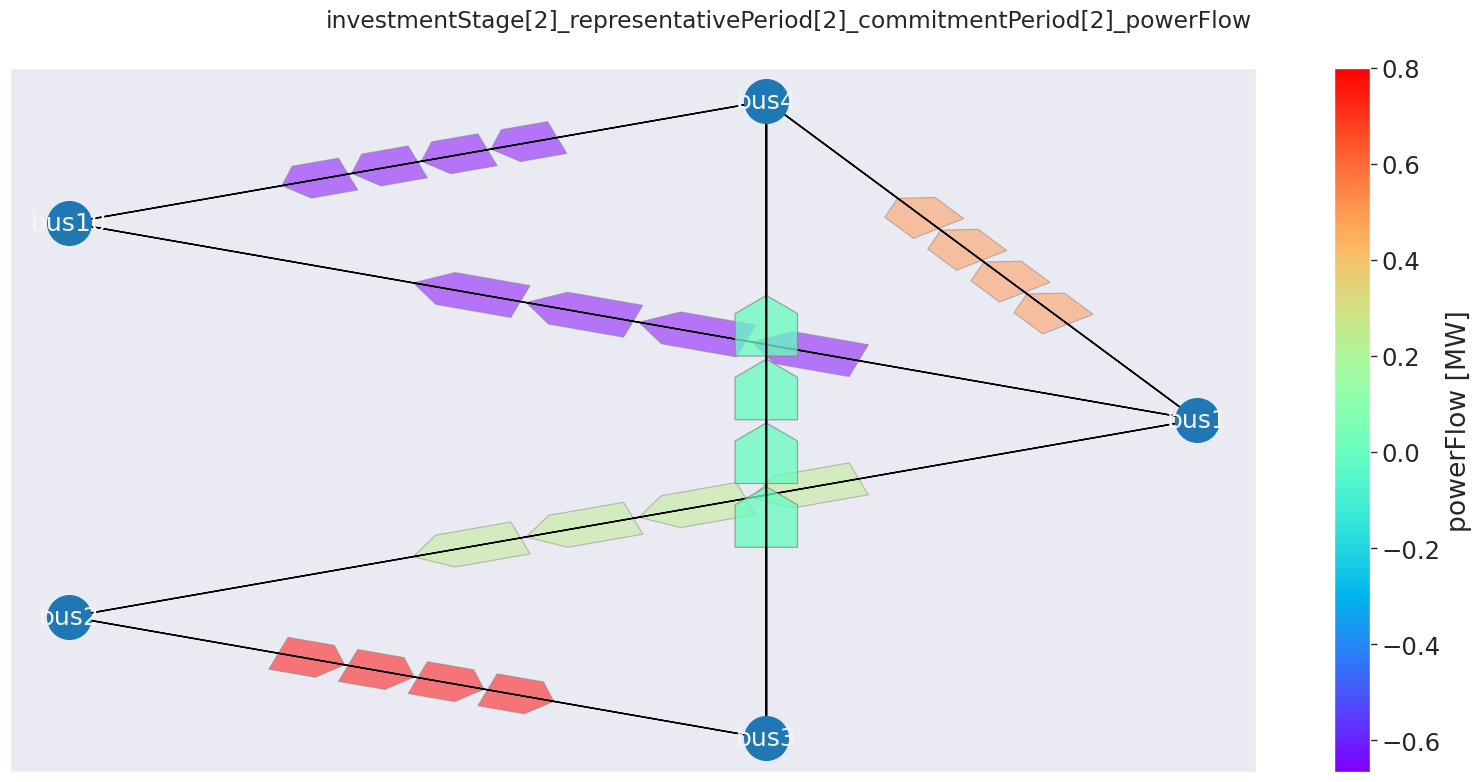

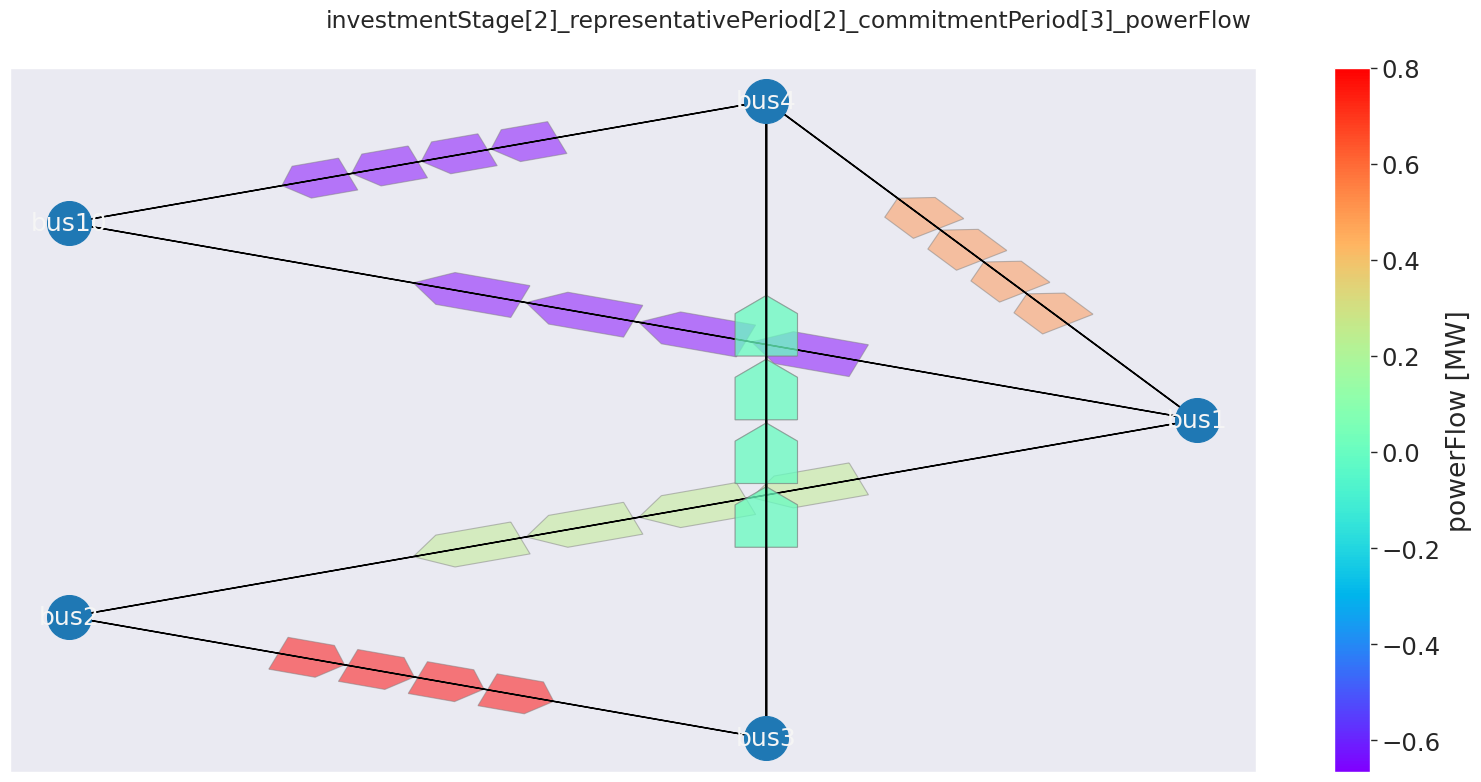

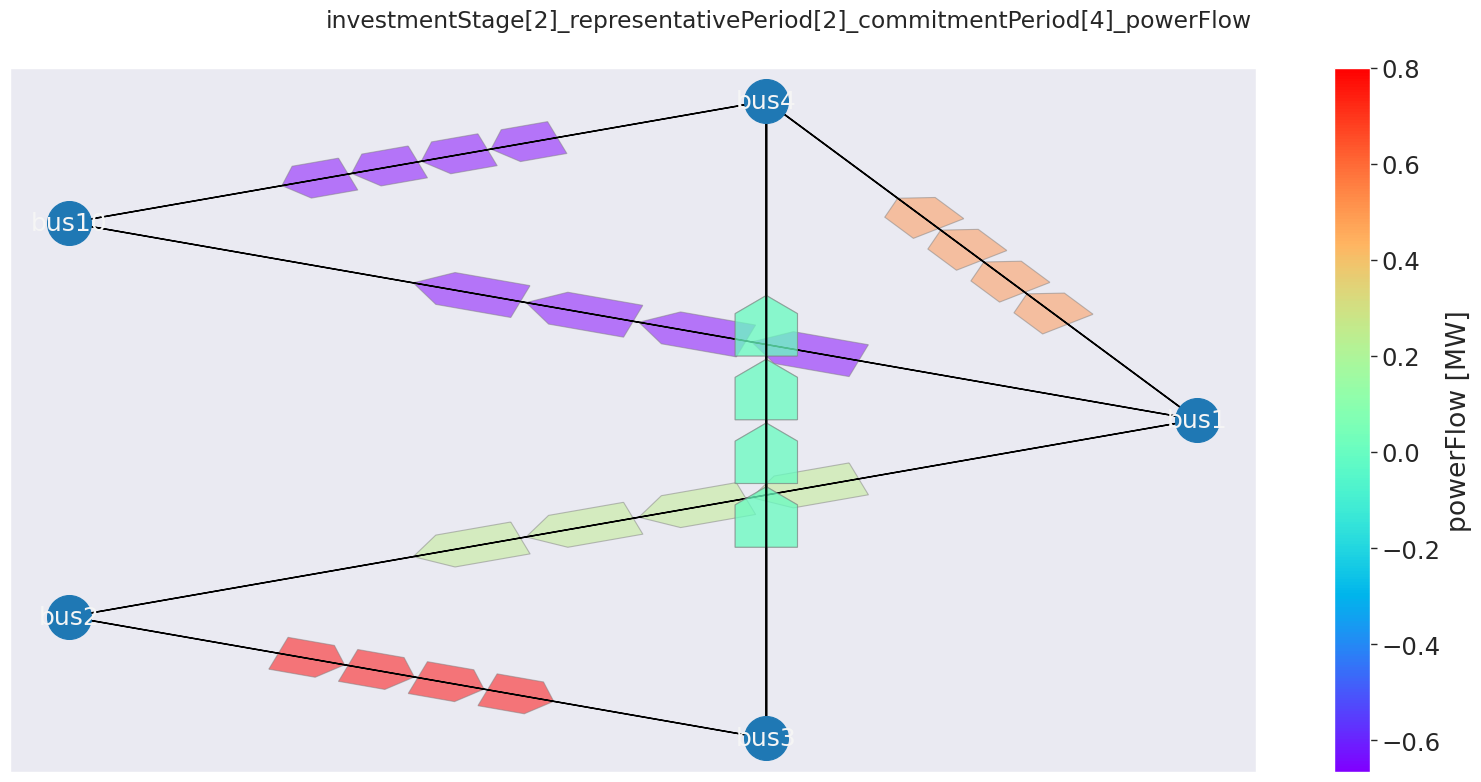

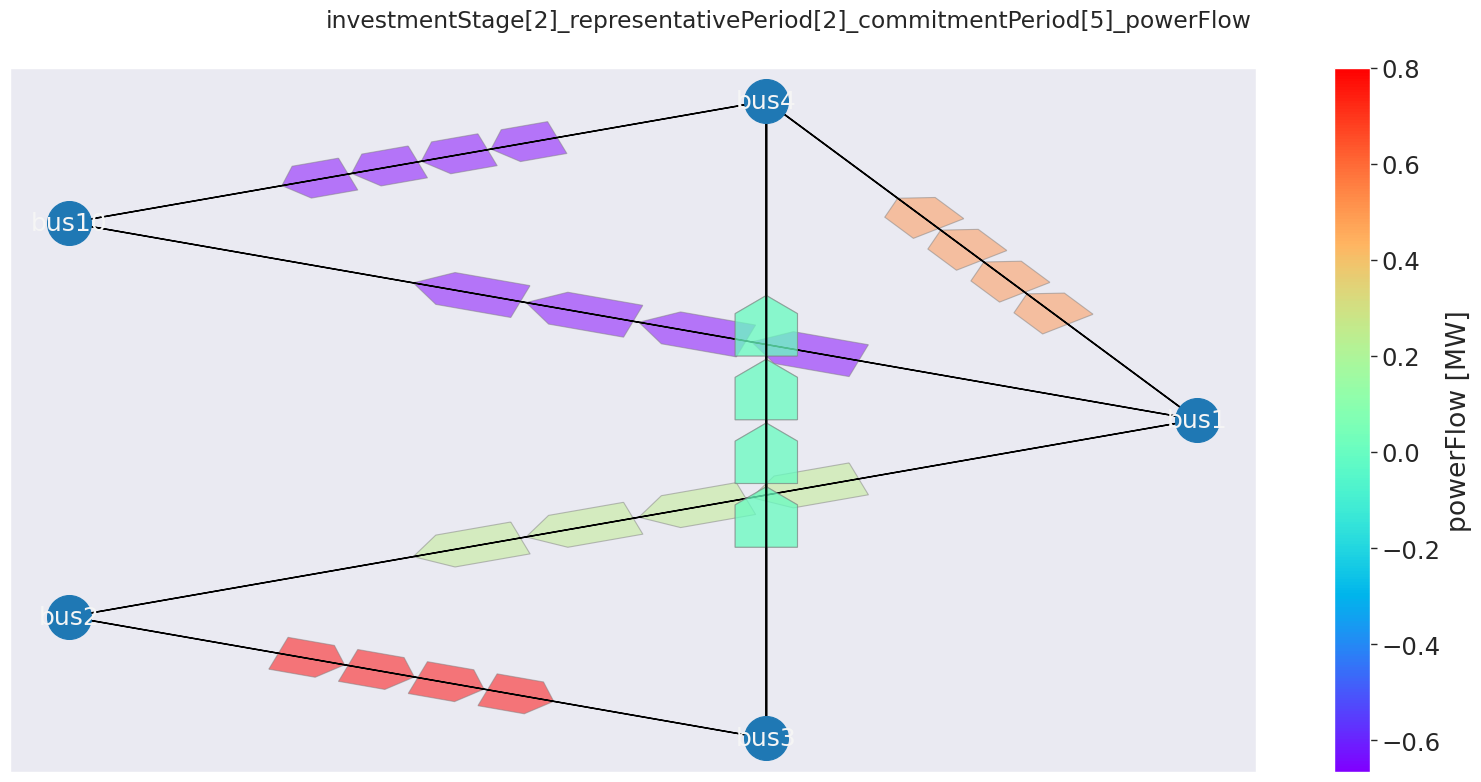

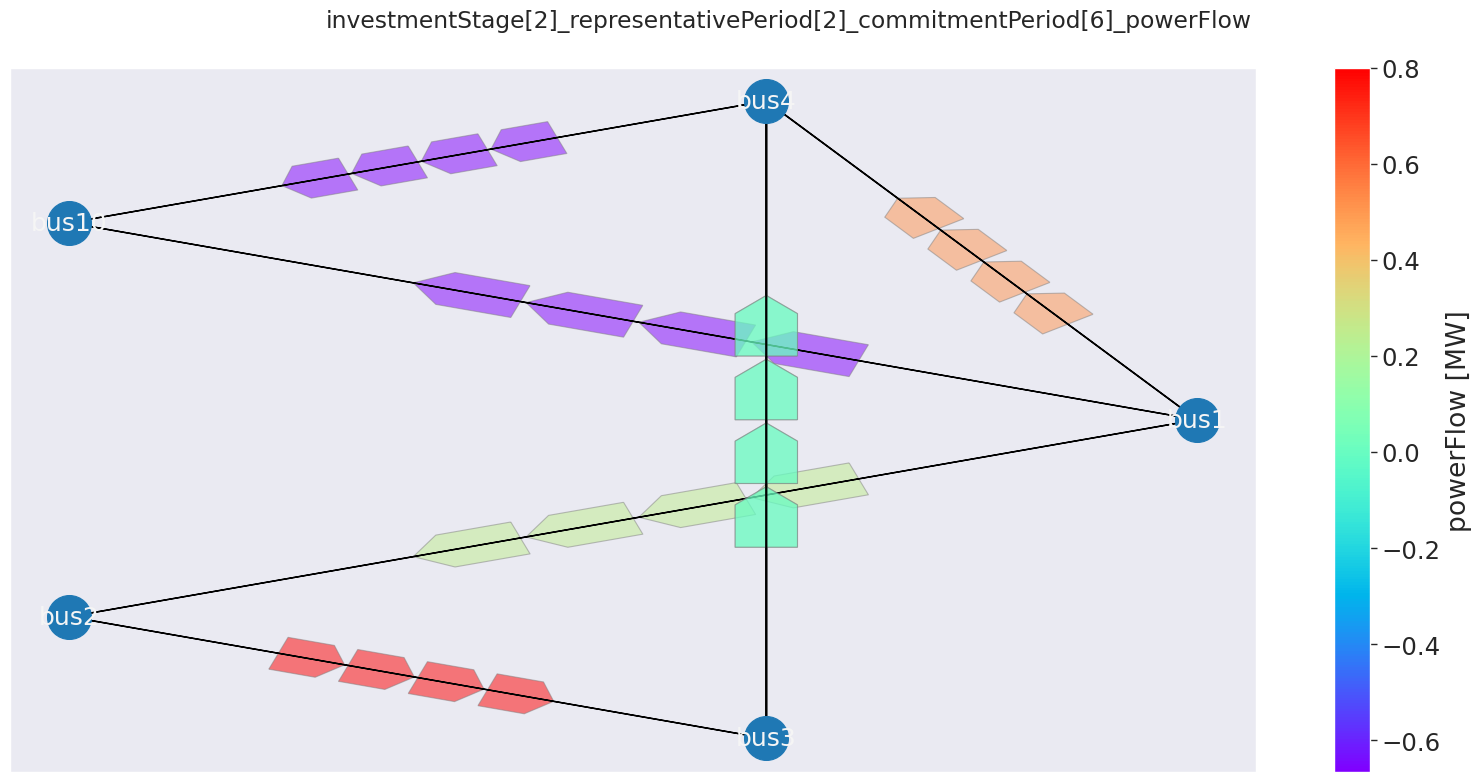

In [7]:
sol_object = ExpansionPlanningSolution()
sol_object.load_from_model(mod_object)
sol_object.dump_json("./gtep_solution.json")
sol_object.import_data_object(data_object)
sol_object.plot_levels(save_dir="./plots/")

### Analysis tools 

Analysis tool information